In this exercise, we will do a couple of examples of data visualization using PCA.

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


Let us start with a simple PCA example using a dataset of United States Senate voting records. 

In [0]:
import pandas as pd

url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]

In [0]:
X = np.array(senator_df.values[:, 3:].T, dtype='float64') #transpose to get senators as rows

In [4]:
typical_row = X[0,:]
print(typical_row.shape)
print(typical_row)

(542,)
[ 1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.
 -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  0. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  0.  0.  1.  1. -1.  1.
  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  0. -1. -1.  1.  1. -1.
  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  0.  1.  0. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.

It's usually good practice to center the data before doing PCA. Let's verify that the means are nonzero.

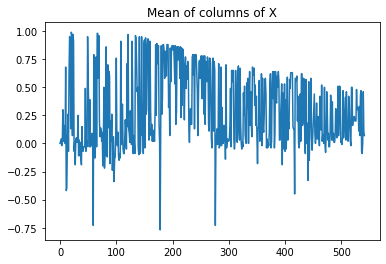

In [5]:
X_mean = np.mean(X, axis = 0)
plt.plot(X_mean)
plt.title('Mean of columns of X')
plt.show()

In [0]:
X_original = X.copy()
X = X - np.mean(X, axis = 0)

In [7]:
affiliations = af["affiliations"]
print(affiliations)

0      Red
1     Blue
2     Blue
3     Blue
4     Blue
      ... 
95    Blue
96    Blue
97     Red
98     Red
99     Red
Name: affiliations, Length: 100, dtype: object


Let's test how projections of the data look in a random direction in the data space.

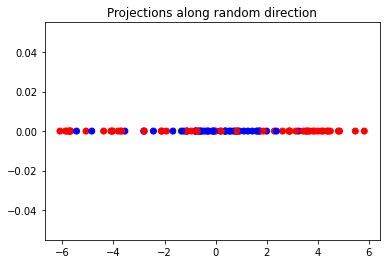

Variance along random direction:  9.220661428488983


In [8]:
a_rand = np.random.rand(542,1) #generate a random direction
a_rand = a_rand/np.linalg.norm(a_rand) #we normalize the vector
scores_rand = np.matmul(X, a_rand)

plt.scatter(scores_rand, np.zeros_like(scores_rand), c=affiliations)
plt.title('Projections along random direction')
plt.show()

print("Variance along random direction: ", scores_rand.var())

Let's now plot the projection along the first principal component.

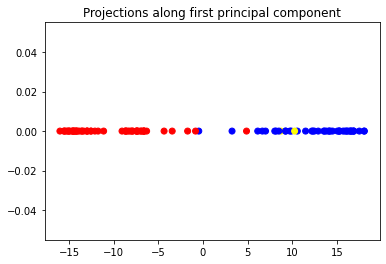

Variance along first principal component:  149.74896507620736


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
a_1 = pca.components_.T # get a_1 that maximizes variance

#Next we compute scores along first principal component
scores_a_1 = np.matmul(X, a_1) #recall definition of f above
plt.scatter(scores_a_1, np.zeros_like(scores_a_1), c=affiliations)
plt.title('Projections along first principal component')
plt.show()

print("Variance along first principal component: ", scores_a_1.var())

Interesting. Almost perfectly along party lines! Here is a better visualization.

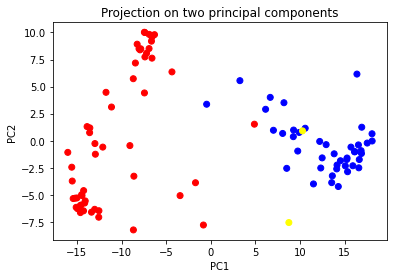

In [10]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X) # alternate way instead of np.matmul

plt.scatter(projected[:, 0], projected[:, 1], c=affiliations)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on two principal components')
plt.show()

Interesting. Who is the Republican senator who voted a lot with the Democrats?

In [11]:
repub = np.where(affiliations=='Red')
repub = np.squeeze(repub)
print(repub)
sen_id = np.where(projected[repub,0] >= 0)
print(repub[sen_id])
print(af[0][repub[sen_id]])

[ 0  7  9 11 13 14 15 18 23 26 27 28 32 33 36 37 38 39 41 42 45 46 47 48
 49 52 53 56 57 58 59 60 66 67 68 69 70 71 72 73 74 78 79 80 82 83 85 89
 90 91 92 93 97 98 99]
[58]
58    Chafee Red
Name: 0, dtype: object


Next, let us do a more challenging example using a dataset of cropped face images called LFW ("Labeled Faces in the Wild").

In [0]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [13]:

# Get images
n_samples, h, w = lfw_people.images.shape
npix = h*w

# Data in 2D form
X = lfw_people.data
n_features = X.shape[1]

# Labels of images 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Image size     = {0:d} x {1:d} = {2:d} pixels".format(h,w,npix))
print("Number faces   = {0:d}".format(n_samples))
print("Number classes = {0:d}".format(n_classes))

Image size     = 50 x 37 = 1850 pixels
Number faces   = 1288
Number classes = 7


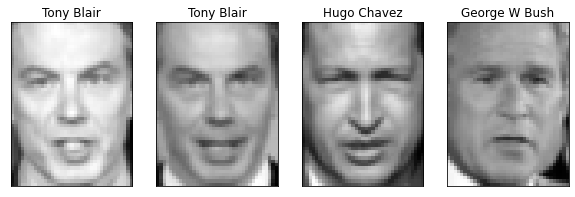

In [14]:
def plt_face(x):
    h = 50
    w = 37
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
I = np.random.permutation(n_samples)
plt.figure(figsize=(10,20))
nplt = 4
for i in range(nplt):    
    ind = I[i]
    plt.subplot(1,nplt,i+1)
    plt_face(X[ind])
    plt.title(target_names[y[ind]])

Center the data once again, and plot a sequence of reconstructions. We can see that roughly 100 components are sufficient to capture most of the information in the image.

In [0]:
npix = h*w
Xmean = np.mean(X,0)
Xs = X - Xmean[None,:]

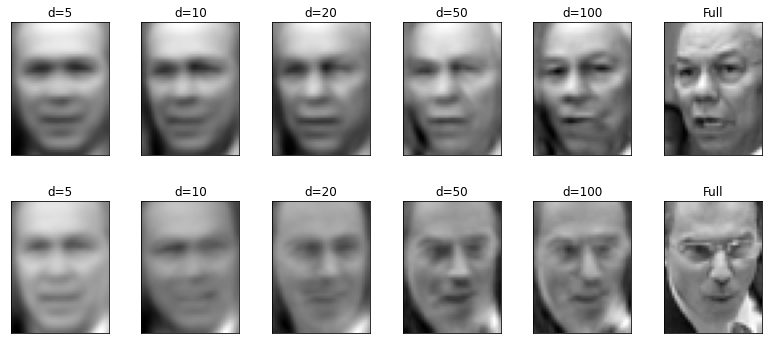

In [16]:
nplt = 2

ds = [5,10,20,50,100]

# Construct the PCA object for up to 100 components
dmax = np.max(ds)
pca = PCA(n_components=dmax, svd_solver='randomized', whiten=True)
    
# Fit and transform the data
pca.fit(X)
Z = pca.transform(X)
    
# Select random faces
inds = np.random.permutation(n_samples)
inds = inds[:nplt]
nd = len(ds)

# Set figure size
plt.figure(figsize=(1.8 * (nd+1), 2.4 * nplt))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

# Loop over figures
iplt = 0
for ind in inds:
  for d in ds:
    plt.subplot(nplt,nd+1,iplt+1)
    Zd = np.copy(Z[ind,:])
    Zd[d:] = 0
    Xhati = pca.inverse_transform(Zd)
            
    plt_face(Xhati)
    plt.title('d={0:d}'.format(d))
    iplt += 1
    
    # Plot the true face
  plt.subplot(nplt,nd+1,iplt+1)
  plt_face(X[ind,:])
  plt.title('Full')
  iplt += 1

PCA has other advantages: we can also do classification/etc in the *principal components* instead of the original data. This (sometimes) has the advantage of speeding up computations. Therefore, PCA is commonly used as a preprocessing step for reducing data dimensionality.

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.25)


Unfortunately, when we reduce dimension via PCA, we may have to do additional parameter tweaking (e.g. a particular kernel bandwidth in the original dimension may not be the optimal choice in the reduced dimension). It is safer to perform a grid search over all parameters.

In [18]:
npc_test = [25,50,75,100,200]
gam_test = [1e-3,4e-3,1e-2,1e-1]
c = 100
n0 = len(npc_test)
n1 = len(gam_test)
acc = np.zeros((n0,n1))
acc_max = 0

for i0, npc in enumerate(npc_test):
    
    # Fit PCA on the training data
    pca = PCA(n_components=npc, svd_solver='randomized', whiten=True)
    pca.fit(Xtr)

    # Transform the training and test
    Ztr = pca.transform(Xtr)
    Zts = pca.transform(Xts)
    
    for i1, gam in enumerate(gam_test):
                
        # Fiting on the transformed training data
        svc = SVC(C=c, kernel='rbf', gamma = gam)
        svc.fit(Ztr, ytr)
        
        # Predict on the test data
        yhat = svc.predict(Zts)
        
        # Compute the accuracy
        acc[i0,i1] = np.mean(yhat == yts)
        print('npc=%d gam=%12.4e acc=%12.4e' % (npc,gam,acc[i0,i1]))
        
        # Save the optimal parameters
        if acc[i0,i1] > acc_max:
            gam_opt = gam
            npc_opt = npc
            acc_max = acc[i0,i1]

npc=25 gam=  1.0000e-03 acc=  7.1118e-01
npc=25 gam=  4.0000e-03 acc=  7.2360e-01
npc=25 gam=  1.0000e-02 acc=  7.3913e-01
npc=25 gam=  1.0000e-01 acc=  7.0186e-01
npc=50 gam=  1.0000e-03 acc=  7.8261e-01
npc=50 gam=  4.0000e-03 acc=  8.0745e-01
npc=50 gam=  1.0000e-02 acc=  8.3230e-01
npc=50 gam=  1.0000e-01 acc=  4.4099e-01
npc=75 gam=  1.0000e-03 acc=  8.1056e-01
npc=75 gam=  4.0000e-03 acc=  8.6025e-01
npc=75 gam=  1.0000e-02 acc=  8.5714e-01
npc=75 gam=  1.0000e-01 acc=  4.0373e-01
npc=100 gam=  1.0000e-03 acc=  8.2919e-01
npc=100 gam=  4.0000e-03 acc=  8.7267e-01
npc=100 gam=  1.0000e-02 acc=  8.4161e-01
npc=100 gam=  1.0000e-01 acc=  3.9752e-01
npc=200 gam=  1.0000e-03 acc=  8.0745e-01
npc=200 gam=  4.0000e-03 acc=  8.0435e-01
npc=200 gam=  1.0000e-02 acc=  5.8385e-01
npc=200 gam=  1.0000e-01 acc=  3.9752e-01


Optimal num PCs = 100
Optimal gamma   = 0.004000


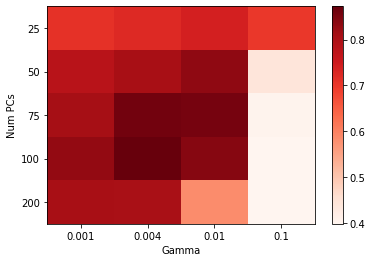

In [19]:
plt.imshow(acc, aspect='auto', cmap='Reds')
plt.xlabel('Gamma')
plt.ylabel('Num PCs')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,n1))
ax.set_xticklabels(gam_test)
ax.set_yticks(np.arange(0,n0))
_ = ax.set_yticklabels(npc_test)

print('Optimal num PCs = %d' % (npc_opt))
print('Optimal gamma   = %f' % (gam_opt))

So from the above heat map we see that 75 principal components with gamma = 0.01 gives the best test error.